## The Battle of Neighborhoods W2


### This is the second portion Week 2 of Capstone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

#import matplotlib 
#import matplotlib as mpl

### Reload Data set  

In [2]:
df = pd.read_csv('week1Check.csv',index_col=0).reset_index(drop=True)
df.shape

(495, 13)

In [3]:
df = df.drop(['Postal Code', 'Latitude', 'Longitude', 'Revenue', 'Employees'], axis=1).reset_index(drop=True) # should we remove postal code?
df.head(5)

,Name,City,Miles to Ft Laud,Miles to Palm Beach,DB Hoovers Industry,Industry,Ownership Type,Parent Country_Region
0,Kemet Corporation,Fort Lauderdale,0.04,41.34,Semiconductor and Other Electronic Component Manufacturing,InfoTech,Private,Taiwan Region
1,Ri/Bbnm Acquisition Corp.,Fort Lauderdale,0.16,41.53,Investment Services,Financial,Private,United States
2,"Advanced Recovery Systems, LLC",Fort Lauderdale,0.22,41.40,Outpatient Care,LifeScience,Private,United States
3,"Templeton International, Inc.",Fort Lauderdale,0.24,41.48,Investment Services,Financial,Private,United States
4,"Templeton/Franklin Investment Services, Inc",Fort Lauderdale,0.24,41.48,Investment Services,Financial,Private,United States


##  Mining the Data (Data Visualization) 

###  Which cities have the most businesses?

In [4]:
# Chart of Cities based on number of businesses meeting criteria
city_group = df.groupby('City').count()
bar = city_group['Name'].reset_index(drop=False)
bar = bar.sort_values(by='Name', ascending=True).reset_index(drop=True)
print(bar.shape)
bar.tail()

(38, 2)


,City,Name
33,Palm Beach Gardens,24
34,Sunrise,27
35,West Palm Beach,57
36,Boca Raton,89
37,Fort Lauderdale,98


The data is for 38 cities


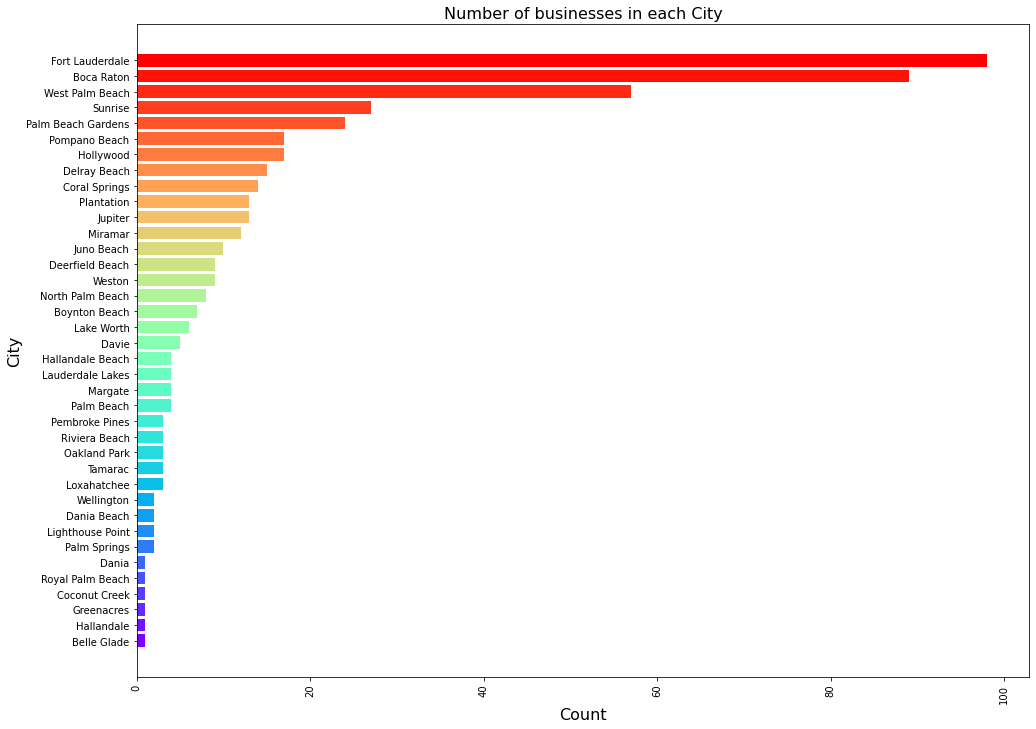

In [5]:
bus_count = bar['Name']
city = bar['City']

colors = cm.rainbow(np.linspace(0, 1, len(bus_count.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("City", fontsize = 16)
plt.title("Number of businesses in each City", fontsize = 16)
plt.barh(city, bus_count.values, color = colors)
print('The data is for {} cities'.format(len(bar['City'].unique())))

### How many businesses per DB Hoover Industry Category?

In [6]:
# Number of businesses per DBH database Industry categories 
df_cat = df.groupby(['DB Hoovers Industry']).count()
df_cat = df_cat['Name'].reset_index(drop=False)
df_cat = df_cat.sort_values(by='Name', ascending=False).reset_index(drop=True)
#print(df_cat.shape)

#### As a percent of total.

In [7]:
dfcat = df['DB Hoovers Industry'].value_counts(normalize=True).reset_index(drop=False)
dfcat.columns = ['DBH Category', 'Count']
print(df_cat.shape)
dfcat.head(10) 

(25, 2)


,DBH Category,Count
0,Physicians and Health Practitioners,0.179798
1,Computer Programming,0.092929
2,Banking,0.088889
3,Computer System Design Services,0.080808
4,Hospitals,0.074747
5,Investment Services,0.072727
6,Health and Personal Care Wholesale,0.050505
7,Pharmaceutical Manufacturing,0.046465
8,Medical Equipment and Supplies,0.042424
9,Electricity Generation and Distribution,0.036364


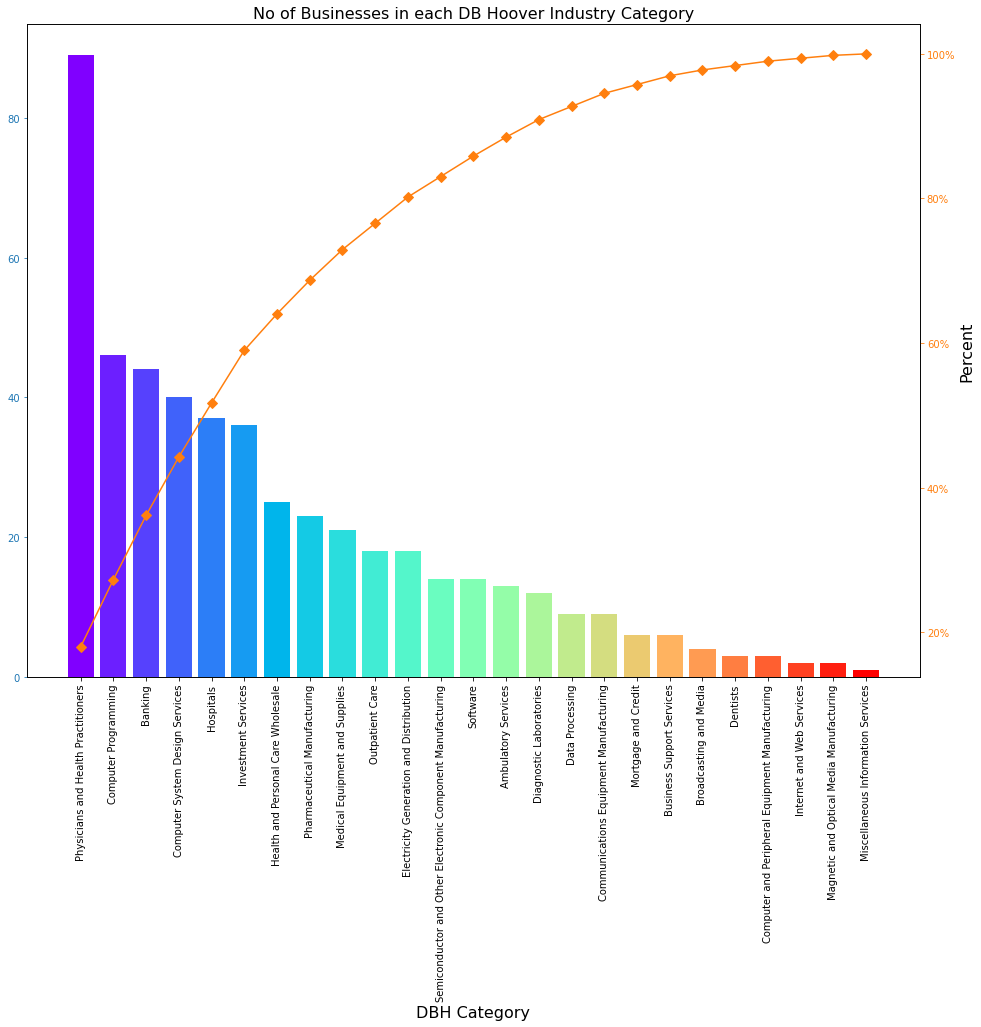

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

cat_count = df_cat['Name']
dbh_cat = df_cat['DB Hoovers Industry']
dfcat["cumpercentage"] = dfcat["Count"].cumsum()/dfcat["Count"].sum()*100

fig, ax = plt.subplots(figsize = (16,12), sharex='all')
colors = cm.rainbow(np.linspace(0, 1, len(cat_count.index)))

plt.xticks(rotation = 90) 
plt.xlabel("Business Category", fontsize = 16)

ax.bar(dbh_cat, cat_count.values, color = colors) # change back to plt
ax2 = ax.twinx()
ax2.plot(dfcat.index, dfcat["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel("DBH Category", fontsize = 16)


plt.ylabel("Percent", fontsize = 16)
plt.title("No of Businesses in each DB Hoover Industry Category", fontsize = 16)
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

In [9]:
#city_df.to_csv('week2.csv') # explort file for seeding geocooridnates for city data only.

### What is the distribution of Ownership Type across the businesses?

In [10]:
#Chart of data set based on number of businesses ownership type 
ownertype = df.groupby('Ownership Type').count()
ownertype = ownertype['Name'].reset_index(drop=False)
ownertype = ownertype.sort_values(by='Name', ascending=False).reset_index(drop=True)
ownertype.tail()

,Ownership Type,Name
0,Private,432
1,Partnership,26
2,Nonprofit,23
3,Public,14


In [11]:
owntype = df['Ownership Type'].value_counts(normalize=True).mul(100).reset_index(drop=False)
owntype.columns = ['Ownership Type', 'Percent'] #owntype.style.hide_index()
rounded_df = owntype.round(decimals=2)
rounded_df

,Ownership Type,Percent
0,Private,87.27
1,Partnership,5.25
2,Nonprofit,4.65
3,Public,2.83


### What is the distribution with regards to Parent Country / Region?

In [12]:
region = df['Parent Country_Region'].value_counts(normalize=True).mul(100).reset_index(drop=False)
region.columns = ['Parent Country_Region', 'Percent']
decimal_df = region.round(decimals=2)
decimal_df

,Parent Country_Region,Percent
0,United States,93.13
1,United Kingdom,1.21
2,Canada,0.81
3,Ireland,0.61
4,Netherlands,0.61
5,Israel,0.61
6,Sweden,0.40
7,Australia,0.40
8,Spain,0.40
9,Mexico,0.20


## Data Wrangling

### Aggregating counts by City

What are the top ten cities based on number of businesses?

In [13]:
city_df = df.groupby('City').count().reset_index(drop=False)
print(city_df.shape)
city_df.head()

(38, 8)


,City,Name,Miles to Ft Laud,Miles to Palm Beach,DB Hoovers Industry,Industry,Ownership Type,Parent Country_Region
0,Belle Glade,1,1,1,1,1,1,1
1,Boca Raton,89,89,89,89,89,89,89
2,Boynton Beach,7,7,7,7,7,7,7
3,Coconut Creek,1,1,1,1,1,1,1
4,Coral Springs,14,14,14,14,14,14,14


In [14]:
city_df.to_csv('week2.csv') # Extract file for seeding with geo cooridnates for cities

### Add geo coordinates for each city to map cities. 

In [15]:
cityloc = pd.read_csv('week2seeded.csv',index_col=0).reset_index(drop=True)
print(cityloc.shape)
cityloc.head(3)

(38, 4)


,City,Businesses,Latitude,Longitude
0,Belle Glade,1,26.684510,-80.667558
1,Boca Raton,89,26.368306,-80.128932
2,Boynton Beach,7,26.531787,-80.090547


### Aggregate counts for businesses and get median distance to Ft Laudedate and Palm Beach for each city. 

In [16]:
cty = df.groupby('City').agg(
    Count=pd.NamedAgg(column="Name", aggfunc="count"),
    MedD_FL=pd.NamedAgg(column="Miles to Ft Laud", aggfunc="median"),
    MedD_PB=pd.NamedAgg(column="Miles to Palm Beach", aggfunc="median")).reset_index(drop=False)
print(cty.shape)
cty.head(3)

(38, 4)


,City,Count,MedD_FL,MedD_PB
0,Belle Glade,1,52.88,38.13
1,Boca Raton,89,18.76,22.61
2,Boynton Beach,7,28.04,14.73


We noticed that median distance to Fort Lauderdale conflicts with Median distance to Palm Beach. This comfounds the k-means alogrithm since both positions will pull against each other. Palm Beach was set as additional criteria over Fort Lauderdale see report.

In [17]:
pb_cty = cty.drop(['MedD_FL'], axis=1).reset_index(drop=True)
pb_cty.head(4)

,City,Count,MedD_PB
0,Belle Glade,1,38.13
1,Boca Raton,89,22.61
2,Boynton Beach,7,14.73
3,Coconut Creek,1,29.20


### Analyze Business type count for each City.

#### Create dummy variables to analyze across Key Industry Type

In [18]:
industry_onehot = pd.get_dummies(df[['Industry']], prefix="", prefix_sep="") # one hot encoding
industry_onehot['City'] = df['City'] # add neighborhood column back to dataframe

# move neighborhood column to the first column
fixed_columns = [industry_onehot.columns[-1]] + list(industry_onehot.columns[:-1])
industry_onehot = industry_onehot[fixed_columns]
print(industry_onehot.shape)
industry_onehot.head(3)

(495, 5)


,City,Clean Tech,Financial,InfoTech,LifeScience
0,Fort Lauderdale,0,0,1,0
1,Fort Lauderdale,0,1,0,0
2,Fort Lauderdale,0,0,0,1


In [19]:
# Group sum for each industry by city
city_ind_group = industry_onehot.groupby('City').sum().reset_index()
print(city_ind_group.shape)
city_ind_group.head()

(38, 5)


,City,Clean Tech,Financial,InfoTech,LifeScience
0,Belle Glade,0,0,0,1
1,Boca Raton,0,16,34,39
2,Boynton Beach,0,1,0,6
3,Coconut Creek,0,0,0,1
4,Coral Springs,0,3,4,7


### Put combine attributes into a pandas dataframe for cluster algorithm.

Extract columns for k-means clustering into a data frame.

In [20]:
pb_cty = pb_cty.join(city_ind_group.set_index('City'), on='City') # add city_ind_group (Key Indystries)
pb_cty.head()

,City,Count,MedD_PB,Clean Tech,Financial,InfoTech,LifeScience
0,Belle Glade,1,38.13,0,0,0,1
1,Boca Raton,89,22.61,0,16,34,39
2,Boynton Beach,7,14.73,0,1,0,6
3,Coconut Creek,1,29.20,0,0,0,1
4,Coral Springs,14,33.27,0,3,4,7


In [21]:
import matplotlib.pyplot as plt

## Analysis - k means 

### Find the optimal k value for clustering.

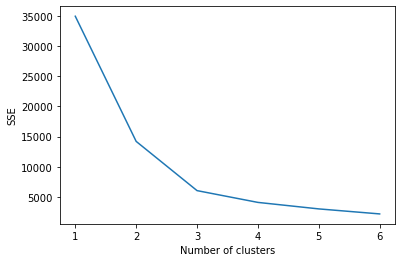

In [22]:
city_ind_group_clustering = pb_cty.drop('City', 1) # changed to cty dataframe

sse = {}
for k in range(1,7): # ran to 8
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(pb_cty.drop('City',axis=1))
    city_ind_group['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

###  Perform Clustering with k=3 clusters

In [23]:
kclusters = 3 # set number of clusters based on elbow
ind_group_clustering = pb_cty.drop('City', 1) # changed to cty dataframe
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ind_group_clustering) # run k-means clustering
kmeans.labels_[0:10]  # check cluster labels generated for each row in the dataframe

array([2, 1, 0, 2, 2, 2, 2, 2, 2, 0])

In [24]:
# merge data frames add cluster labels and latitude/longitude then reorder
pb_cty.insert(0, 'Cluster Labels', kmeans.labels_) # add clustering labels
pb_cty_merged = pb_cty.join(cityloc.set_index('City'), on='City') # add (city geo coordinates)
pb_cty_merged = pb_cty_merged[['City', 'Cluster Labels', 'Businesses', 'LifeScience', 'InfoTech', 'Financial', 'Clean Tech', 'MedD_PB', 'Latitude', 'Longitude']]
pb_cty_merged.head(5)

,City,Cluster Labels,Businesses,LifeScience,InfoTech,Financial,Clean Tech,MedD_PB,Latitude,Longitude
0,Belle Glade,2,1,1,0,0,0,38.13,26.684510,-80.667558
1,Boca Raton,1,89,39,34,16,0,22.61,26.368306,-80.128932
2,Boynton Beach,0,7,6,0,1,0,14.73,26.531787,-80.090547
3,Coconut Creek,2,1,1,0,0,0,29.20,26.251748,-80.178935
4,Coral Springs,2,14,7,4,3,0,33.27,26.271192,-80.270604


In [25]:
address = 'Fort Lauderdale, FL'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Fort Lauderdale are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Fort Lauderdale are 26.1223084, -80.1433786.


In [26]:
# create map
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pb_cty_merged['Latitude'], pb_cty_merged['Longitude'], pb_cty_merged['City'], pb_cty_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Heat Map of Cities based on number of businesses

In [27]:
cityloc['Businesses'] = cityloc['Businesses'].astype(float) # Converted dtype to float for heat map
from folium.plugins import HeatMap
from sklearn import preprocessing

m = folium.Map([latitude, longitude], zoom_start=8)
data = cityloc[['Latitude', 'Longitude', 'Businesses']].values
heat_data = [[row['Latitude'], row['Longitude'], index] for index, row in cityloc.iterrows()]
HeatMap(data, 
        max_val=max(cityloc['Businesses'].values)).add_to(m)
m

## Results

### Examine Clusters

#### Cluster 1 - North Cluster (Palm Beach Area)

In [28]:
pb_cty_merged.loc[pb_cty_merged['Cluster Labels'] == 0, pb_cty_merged.columns[[0] + list(range(2, pb_cty_merged.shape[1]))]]

,City,Businesses,LifeScience,InfoTech,Financial,Clean Tech,MedD_PB,Latitude,Longitude
2,Boynton Beach,7,6,0,1,0,14.730,26.531787,-80.090547
9,Delray Beach,15,7,5,2,1,19.510,26.461462,-80.072820
11,Greenacres,1,1,0,0,0,8.490,26.627628,-80.135390
15,Juno Beach,10,0,3,1,6,9.970,26.879782,-80.053374
16,Jupiter,13,7,1,5,0,15.150,26.934225,-80.094209
17,Lake Worth,6,4,1,1,0,8.515,26.616756,-80.068448
20,Loxahatchee,3,2,0,1,0,12.490,26.771624,-80.238888
23,North Palm Beach,8,0,1,2,5,9.970,26.817116,-80.059080
25,Palm Beach,4,1,1,2,0,1.085,26.705621,-80.036430
26,Palm Beach Gardens,24,15,4,4,1,9.235,26.839610,-80.101914


#### Cluster 2 - High Density Cluster Cities with Highest Economic Activity 

In [29]:
pb_cty_merged.loc[pb_cty_merged['Cluster Labels'] == 1, pb_cty_merged.columns[[0] + list(range(2, pb_cty_merged.shape[1]))]]

,City,Businesses,LifeScience,InfoTech,Financial,Clean Tech,MedD_PB,Latitude,Longitude
1,Boca Raton,89,39,34,16,0,22.610,26.368306,-80.128932
10,Fort Lauderdale,98,35,44,18,1,37.235,26.122439,-80.137317
36,West Palm Beach,57,31,11,11,4,2.920,26.715342,-80.053375


#### Cluster 3 - South Cluster - (Ft Lauderdale Area)

In [30]:
pb_cty_merged.loc[pb_cty_merged['Cluster Labels'] == 2, pb_cty_merged.columns[[0] + list(range(2, pb_cty_merged.shape[1]))]]

,City,Businesses,LifeScience,InfoTech,Financial,Clean Tech,MedD_PB,Latitude,Longitude
0,Belle Glade,1,1,0,0,0,38.130,26.684510,-80.667558
3,Coconut Creek,1,1,0,0,0,29.200,26.251748,-80.178935
4,Coral Springs,14,7,4,3,0,33.270,26.271192,-80.270604
5,Dania,1,0,1,0,0,46.650,26.052311,-80.143934
6,Dania Beach,2,1,1,0,0,45.870,26.052311,-80.143934
7,Davie,5,3,1,1,0,45.880,26.076478,-80.252116
8,Deerfield Beach,9,3,5,1,0,28.690,26.318412,-80.099766
12,Hallandale,1,0,1,0,0,50.910,25.981202,-80.148379
13,Hallandale Beach,4,0,2,2,0,50.750,25.981202,-80.148379
14,Hollywood,17,8,5,4,0,48.740,26.011201,-80.149490


### Summary of Busineses by Key Industry for each Cluster

In [31]:
df_sum = pb_cty_merged.groupby('Cluster Labels').agg(
    Total=pd.NamedAgg(column="Businesses", aggfunc="sum"),
    LifeScience=pd.NamedAgg(column="LifeScience", aggfunc="sum"),
    InfoTech=pd.NamedAgg(column="InfoTech", aggfunc="sum"),
    Financial=pd.NamedAgg(column="Financial", aggfunc="sum"),
    CleanTech=pd.NamedAgg(column="Clean Tech", aggfunc="sum")).reset_index(drop=False)
df_sum['Cluster Labels'] = df_sum['Cluster Labels'].replace([0,1,2 ],['North Cluster', 'High Density Cluster','South Cluster'])
df_sum

,Cluster Labels,Total,LifeScience,InfoTech,Financial,CleanTech
0,North Cluster,99,51,16,19,13
1,High Density Cluster,244,105,89,45,5
2,South Cluster,152,85,45,22,0


###  Thank You!  - Conclusion and Recommendations are within report 